In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')

In [ ]:
df=pd.read_csv("bdiag.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df=df.drop(['id'],axis=1 )

In [ ]:
df.shape

(569, 31)

In [ ]:
def diagnosis_value_con(diagnosis):
  if diagnosis == 'M':
    return 1
  else:
    return 0

In [ ]:
df['diagnosis']=df['diagnosis'].apply(diagnosis_value_con)

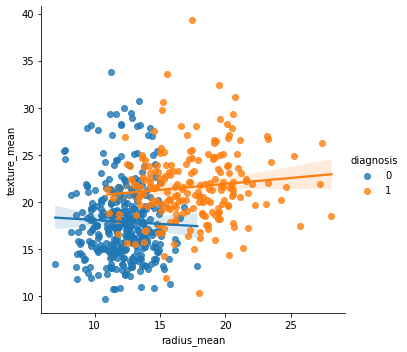

In [ ]:
sns.lmplot(x='radius_mean',y='texture_mean',hue='diagnosis',data=df)

In [ ]:
df1=df[['radius_mean','texture_mean']]
df2=df['diagnosis']

In [ ]:
x=df1
y=df2

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,y_test)

0.9035087719298246

In [ ]:

neighbors = []
cv_scores = []
for k in range(1,51,2):
  neighbors.append(k)
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(
      knn,X_train,y_train,cv=10,scoring='accuracy'
  )
  cv_scores.append(scores.mean())

scores =cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(scores)

[0.80701754 0.85964912 0.9122807  0.85964912 0.92982456 0.92982456
 0.92982456 0.9122807  0.96491228 0.82142857]


In [ ]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Confusion matrix :\n\n")

print(metrics.confusion_matrix(y_test,y_pred))

print("Classification report :\n\n")
print(classification_report(y_test,y_pred))

Confusion matrix :


[[66  5]
 [ 6 37]]
Classification report :


              precision    recall  f1-score   support

           0       0.92      0.93      0.92        71
           1       0.88      0.86      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



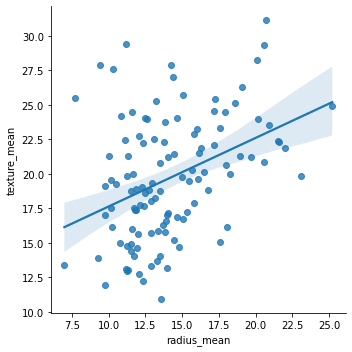

In [ ]:
sns.lmplot(x='radius_mean',y='texture_mean',data=X_test)

In [ ]:
## perform the training with k=15
x=df1
y=df2
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=110)

In [ ]:
knn=KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn.score(X_test,y_test)

0.8771929824561403

In [ ]:
print("Classification report :\n\n")
print(classification_report(y_test,y_pred))

Classification report :


              precision    recall  f1-score   support

           0       0.65      0.64      0.65        73
           1       0.38      0.39      0.39        41

    accuracy                           0.55       114
   macro avg       0.52      0.52      0.52       114
weighted avg       0.56      0.55      0.55       114



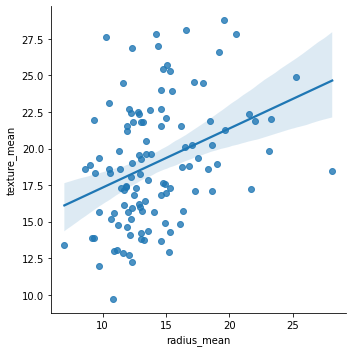

In [ ]:
sns.lmplot(x='radius_mean',y='texture_mean',data=X_test)